# Fierce Research - Rate of Inflation in the United States 

In this blog, I looked at the impact of inflation on different asset classes and the S&P 500 Sectors.

## Rate of Inflation and Cross-Asset Classes

US Equities, Real Bond Yield, Inflation, Real Estate, Commodities since 1914*

Timeframe: 
- Dow Jones Index, Real Bond Yield = 1900
- US CPI YoY = 1914
- Real Estate - Existing Home Sales Avg Price = 1968
- S&P GSCI Commodities = 1969

In [1]:
import pandas as pd
import numpy as np

import datetime as dt
from datetime import datetime

import seaborn as sns
sns.set_style('whitegrid')
import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib.pyplot as plt
%matplotlib inline

import PyDSWS as PyDSWS
ds = PyDSWS.Datastream(username='x', password='x')

df = ds.get_data(tickers='PCH#(USSHRPRCF,1Y), USGB10YR, USEBMCPI%, PCH#(USHSAVGEA,1Y), PCH#(GSCITOT,1Y)',
                  start="-120Y",end="-1", freq="M")

df.columns= ['1Y% Chg Dow Jones','US 10Y Real', 'CPI YoY', '1Y% Chg US Home Price Index','1Y% Chg GSCI Commodity Total Return']
df = df.round(2)
df

,1Y% Chg Dow Jones,US 10Y Real,CPI YoY,1Y% Chg US Home Price Index,1Y% Chg GSCI Commodity Total Return
Date,,,,,
1901-05-30,28.21,2.89,NaN,NaN,NaN
1901-06-27,39.47,2.88,NaN,NaN,NaN
1901-07-30,26.11,2.89,NaN,NaN,NaN
1901-08-29,27.09,2.92,NaN,NaN,NaN
1901-09-29,23.13,2.90,NaN,NaN,NaN
...,...,...,...,...,...
2020-12-30,7.25,-0.44,1.4,10.0,-24.95
2021-01-28,6.11,-0.34,1.4,11.5,-22.76
2021-02-25,23.58,-0.43,1.7,11.9,-5.80


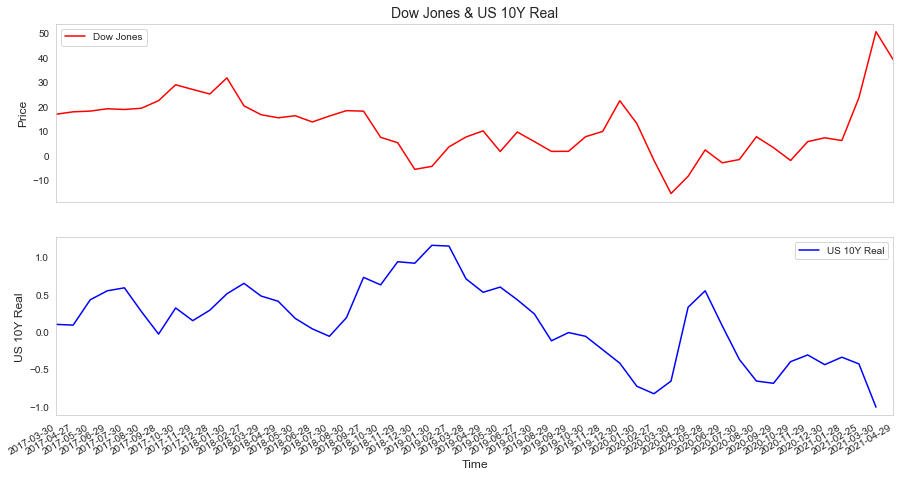

In [2]:
import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=(15,8))
gridspec.GridSpec(2,1)

plt.subplot2grid((2,1), (0,0),rowspan=1)  
plt.plot(df.index[-50:],df['1Y% Chg Dow Jones'][-50:],label='Dow Jones', color='red')
plt.xlabel('Time', size=12)
plt.ylabel('Price',size=12)
plt.legend()
plt.xlim(df.index[-50],df.index[-1])
plt.title('Dow Jones & US 10Y Real',size=14)
plt.grid()
fig.autofmt_xdate()

plt.subplot2grid((2,1), (1,0),rowspan=1)
plt.plot(df.index[-50:],df['US 10Y Real'][-50:],label='US 10Y Real', color='Blue')
plt.xlabel('Time', size=12)
plt.ylabel('US 10Y Real',size=12)
plt.xlim(df.index[-50],df.index[-1])
plt.legend()
plt.grid()
fig.autofmt_xdate()

In [3]:
df.describe().round()

,1Y% Chg Dow Jones,US 10Y Real,CPI YoY,1Y% Chg US Home Price Index,1Y% Chg GSCI Commodity Total Return
count,1432.0,1435.0,1287.0,627.0,604.0
mean,7.0,2.0,3.0,5.0,9.0
std,21.0,5.0,5.0,5.0,25.0
min,-71.0,-18.0,-16.0,-17.0,-63.0
25%,-5.0,0.0,1.0,3.0,-6.0
50%,7.0,2.0,3.0,5.0,7.0
75%,19.0,4.0,4.0,9.0,25.0
max,129.0,21.0,24.0,21.0,108.0


In [4]:
df.corr().round(2)

,1Y% Chg Dow Jones,US 10Y Real,CPI YoY,1Y% Chg US Home Price Index,1Y% Chg GSCI Commodity Total Return
1Y% Chg Dow Jones,1.00,-0.01,0.00,0.07,0.03
US 10Y Real,-0.01,1.00,-0.85,-0.21,-0.21
CPI YoY,0.00,-0.85,1.00,0.45,0.45
1Y% Chg US Home Price Index,0.07,-0.21,0.45,1.00,0.25
1Y% Chg GSCI Commodity Total Return,0.03,-0.21,0.45,0.25,1.00


In [5]:
cpi_group = []
for x in df['CPI YoY']:
    if x < 1:
        cpi_group.append('< 1%')
    elif x < 2:
        cpi_group.append('> 1% < 2%')
    elif x < 3:
        cpi_group.append('> 2% < 3%')
    elif x < 4:
        cpi_group.append('> 3% < 4%')
    else:
        cpi_group.append('> 4%')
df['cpi group'] = cpi_group

df_ = df.groupby(['cpi group']).mean().round(2)

df_.style.highlight_max(color = 'lightgreen', axis = 0)

,1Y% Chg Dow Jones,US 10Y Real,CPI YoY,1Y% Chg US Home Price Index,1Y% Chg GSCI Commodity Total Return
cpi group,,,,,
< 1%,5.150000,5.560000,-2.420000,-2.090000,-42.140000
> 1% < 2%,9.530000,2.100000,1.430000,6.050000,-10.950000
> 2% < 3%,14.300000,1.900000,2.450000,4.420000,7.600000
> 3% < 4%,8.550000,2.190000,3.410000,4.360000,19.560000
> 4%,4.030000,-0.670000,8.660000,7.450000,21.460000


### Summary: 
- When CPI is below 1%, a longer duration in Fixed Income is desired
- The sweet spot for US Equities Large-Cap is when the CPI is between 2 and 3%
- As the CPI creeps above 4%, it appears to be rewarding to overweight Real Estate and Commodities

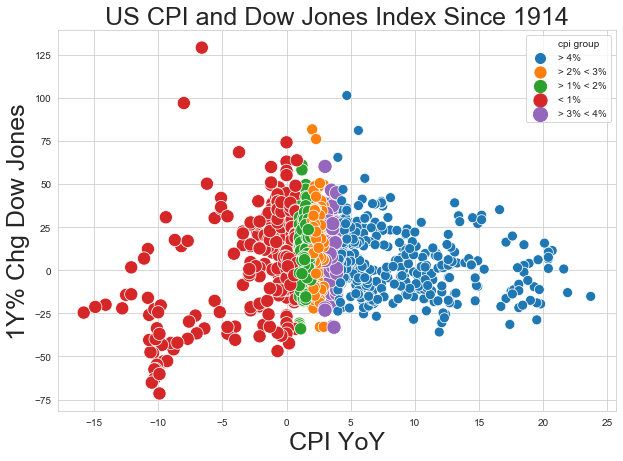

In [6]:
fig = plt.figure(figsize=(10,7))
plt.title('US CPI and Dow Jones Index Since 1914',size=25)
plt.xlabel(' ',size=25)
plt.ylabel(' ',size=25)
sns.scatterplot(x=df['CPI YoY'],y=df['1Y% Chg Dow Jones'],hue=df['cpi group'],size=df['cpi group'],sizes=(200,100));

## Rate of Inflation and the S&P 500 Sectors since 1989

In [7]:
import pandas as pd
import numpy as np

import datetime as dt
from datetime import datetime

import seaborn as sns
sns.set_style('whitegrid')
import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib.pyplot as plt
%matplotlib inline

import PyDSWS as PyDSWS
ds = PyDSWS.Datastream(username='x', password='x')

df1 = ds.get_data(tickers='USEBMCPI%, PCH#(SP5EENE,1Y), PCH#(SP5EIND,1Y),PCH#(SP5EINT,1Y),PCH#(SP5EFIN,1Y), PCH#(SP5EMAT,1Y), PCH#(SP5EUTL,1Y), PCH#(SP5ETEL,1Y), PCH#(SP5ECOD,1Y), PCH#(SP5ECST,1Y),PCH#(SP5EHCR,1Y),PCH#(SP5ER11,1Y)',
                  start="-367",end="-1", freq="M")

df1.columns= ['cpi','energy','industrials','info tech','financials','materials','utilities','comm services','cons discr','cons staples','health care','real estate']
df1 = df1.round(2)
df1

,cpi,energy,industrials,info tech,financials,materials,utilities,comm services,cons discr,cons staples,health care,real estate
Date,,,,,,,,,,,,
1990-10-14,6.3,9.19,-18.25,-17.58,-40.19,-21.67,-4.91,-14.79,-27.45,4.60,6.86,NaN
1990-11-14,6.3,12.24,-10.24,-7.79,-34.44,-17.19,-0.75,-5.73,-21.31,13.37,12.63,NaN
1990-12-14,6.1,0.38,-9.22,-2.34,-24.72,-14.28,-3.90,-13.18,-14.81,14.69,13.72,NaN
1991-01-14,5.7,-1.19,-13.44,-4.25,-26.27,-17.85,-5.72,-16.17,-17.65,9.14,8.05,NaN
1991-02-14,5.3,3.56,6.70,14.54,-0.86,1.37,-2.72,-4.12,3.58,32.36,30.41,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-14,1.4,-30.82,10.38,44.06,-4.48,19.83,-1.18,23.13,33.74,8.28,12.92,-2.94
2021-01-14,1.4,-33.29,8.05,36.81,-0.68,28.69,-1.99,17.53,31.29,7.20,13.23,-8.46
2021-02-14,1.7,-22.00,5.90,34.76,-0.32,20.69,-7.40,24.25,36.02,2.59,11.46,-4.62


In [8]:
df1.describe().round()

,cpi,energy,industrials,info tech,financials,materials,utilities,comm services,cons discr,cons staples,health care,real estate
count,366.0,367.0,367.0,367.0,367.0,367.0,367.0,367.0,367.0,367.0,367.0,222.0
mean,2.0,6.0,9.0,16.0,9.0,7.0,5.0,5.0,11.0,9.0,11.0,8.0
std,1.0,20.0,18.0,28.0,24.0,17.0,16.0,21.0,18.0,13.0,18.0,23.0
min,-2.0,-52.0,-59.0,-64.0,-75.0,-57.0,-46.0,-55.0,-47.0,-29.0,-31.0,-67.0
25%,2.0,-6.0,1.0,2.0,-3.0,-1.0,-1.0,-6.0,2.0,2.0,0.0,-2.0
50%,2.0,7.0,11.0,14.0,10.0,10.0,7.0,4.0,13.0,8.0,9.0,8.0
75%,3.0,19.0,20.0,31.0,22.0,17.0,15.0,19.0,22.0,16.0,23.0,19.0
max,6.0,53.0,94.0,111.0,150.0,82.0,42.0,68.0,96.0,44.0,58.0,125.0


In [9]:
df1.corr().round(2).sort_values('cpi',ascending=False).iloc[:,:1]

,cpi
cpi,1.00
energy,0.54
real estate,0.23
utilities,0.22
materials,0.21
industrials,0.18
cons staples,0.16
financials,0.08
health care,0.05
info tech,0.00


In [10]:
cpi_group = []
for x in df1['cpi']:
    if x < 1:
        cpi_group.append('< 1%')
    elif x < 2:
        cpi_group.append('> 1% < 2%')
    elif x < 3:
        cpi_group.append('> 2% < 3%')
    elif x < 4:
        cpi_group.append('> 3% < 4%')
    else:
        cpi_group.append('> 4%')
df1['cpi group'] = cpi_group

df1_ = df1.groupby(['cpi group']).mean().round(2)

df1_.style.highlight_max(color = 'lightgreen', axis = 0)

,cpi,energy,industrials,info tech,financials,materials,utilities,comm services,cons discr,cons staples,health care,real estate
cpi group,,,,,,,,,,,,
< 1%,-0.120000,-25.160000,-14.290000,-0.470000,-17.830000,-15.730000,-7.060000,-9.030000,-2.840000,-0.910000,1.320000,-14.040000
> 1% < 2%,1.500000,-2.590000,8.730000,15.860000,9.440000,6.390000,5.040000,9.000000,17.920000,10.330000,13.770000,10.980000
> 2% < 3%,2.460000,11.010000,15.200000,24.920000,18.090000,13.900000,5.220000,9.230000,15.360000,9.680000,13.950000,13.690000
> 3% < 4%,3.310000,15.200000,9.940000,9.350000,10.090000,5.920000,10.180000,1.080000,7.170000,8.240000,7.780000,11.520000
> 4%,4.810000,18.620000,2.720000,3.730000,-10.290000,7.160000,5.240000,-4.250000,-5.290000,12.040000,9.390000,-2.300000


### Summary: 
- At the current CPI level, it is best to overweight info tech, financials, industrials, real estate, and materials
- As the CPI creeps up above 4%, it is recommended to overweight energy, consumer staples, health care, and materials 

Guillaume Girard, CMT

Fierce Research